#### Main code to analyse the .csv files from Simion

##### Libraries

#### Analysis of results for Vtrap and Vendcap together

In [1]:
#!pip install uncertainties
import pandas as pd
import math
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from uncertainties import ufloat as uf
import uncertainties.unumpy as unp

import matplotlib.patheffects as path_effects

#PATH = "C:\Program Files\SIMION-8.1\lib\python"

#assert os.path.exists(PATH)

#from SIMION.PA import *

#### Split big .csv into smaller ones (Optional)

In [3]:
T1_min = 17
T1_max = 22
T2_min = 19
T2_max = 23
T1_step = 0.1
T2_step = 0.1
T_stab = 200


chunksize_split = int((T1_max - T1_min)/T1_step) * int((T2_max - T2_min)/T2_step) * 201

#data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/data_Time(17_22_19_23_' + str(V_endcap) + '_200)_4_v2.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'


def write_chunk(part, lines):
    with open('C:/Users/r0867867/Documents/IonTrap_v2/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(part) + '_' + str(T_stab) + ')_v3.csv', 'w') as f_out:
        f_out.write(header)
        f_out.writelines(lines)
with open("C:/Users/r0867867/Documents/IonTrap_v2/data_Time(17_22_19_23_0_200)_v3.txt", "r") as f:
    count = 0
    header = f.readline()
    lines = []
    for line in f:
        count += 1
        lines.append(line)
        if count % chunksize_split == 0:
            write_chunk(count // chunksize_split, lines)
            lines = []
    # write remainder
    if len(lines) > 0:
        write_chunk((count // chunksize_split) + 1, lines)

##### True for VvsZ and False for T$_1$ vs T$_2$

In [2]:
chunksize = 201

answer = False

##### T$_1$ vs T$_2$ part

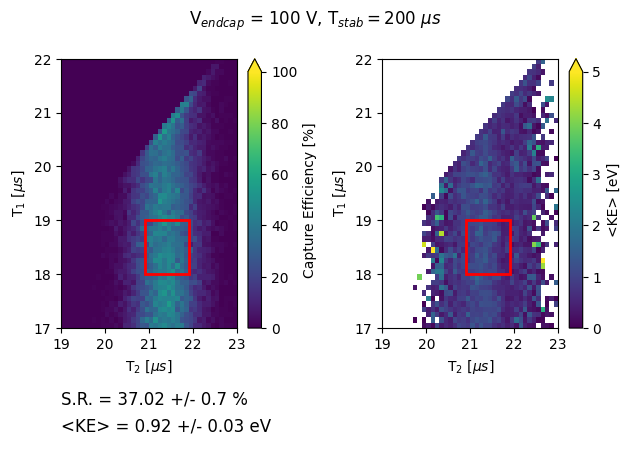

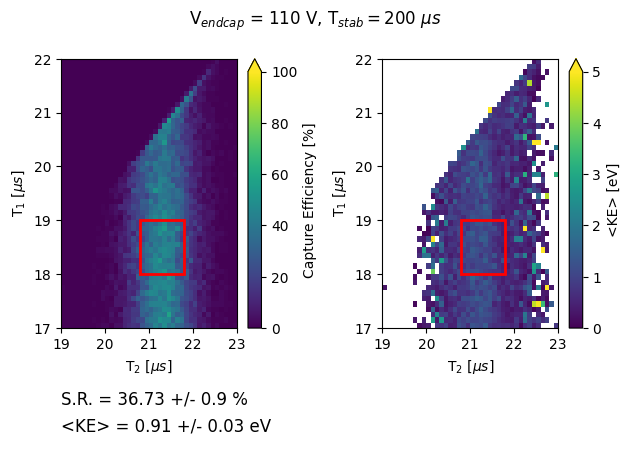

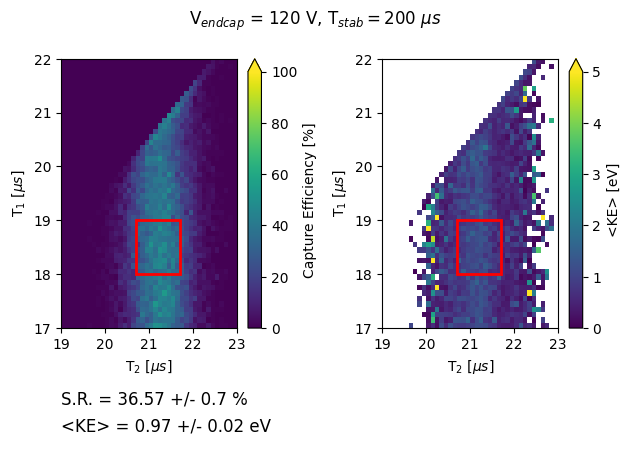

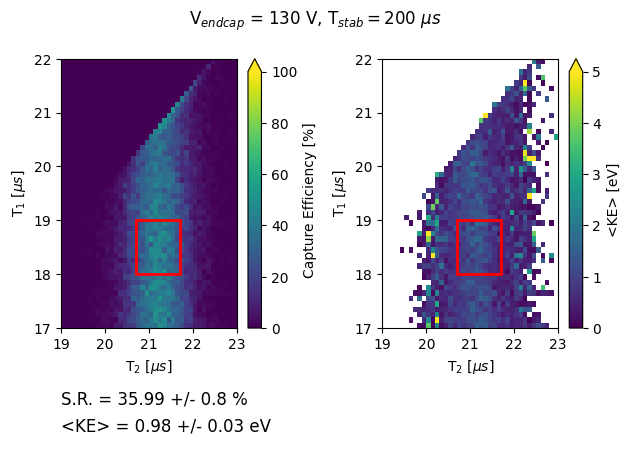

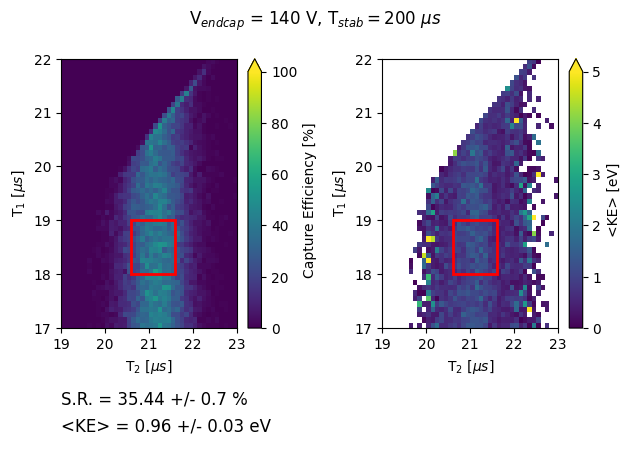

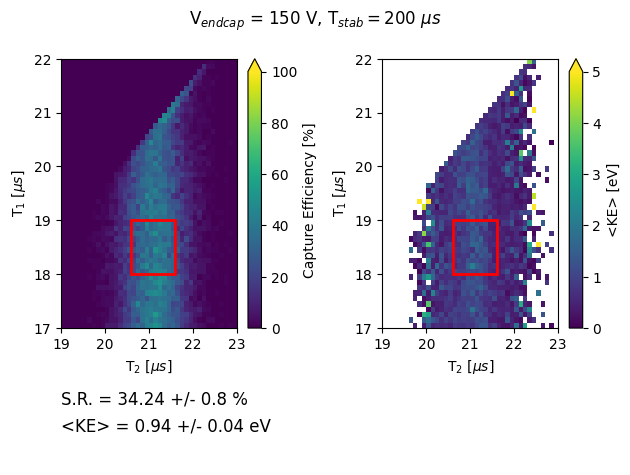

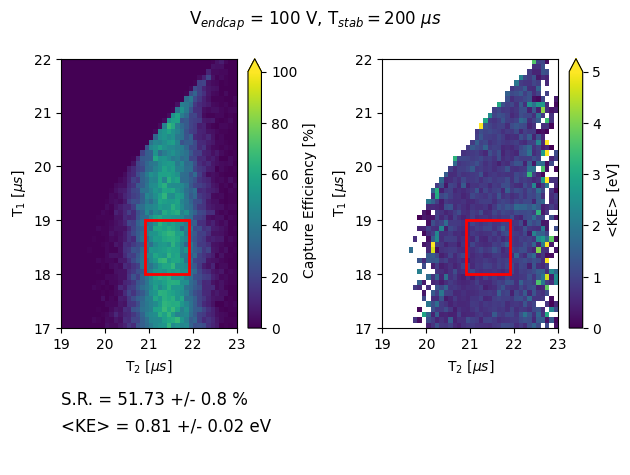

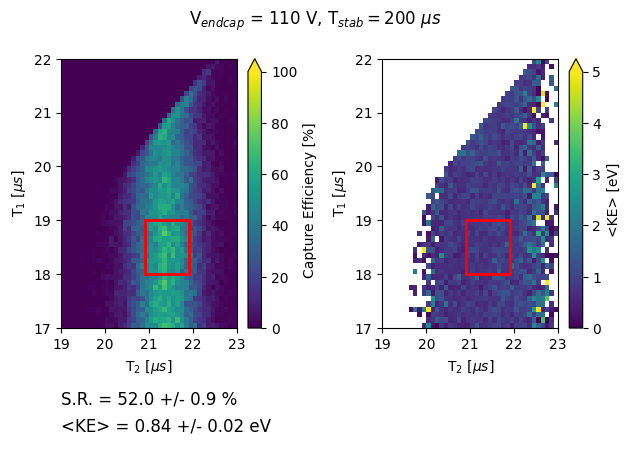

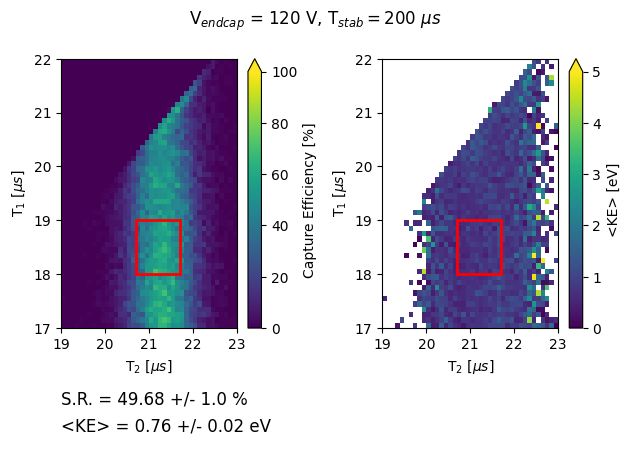

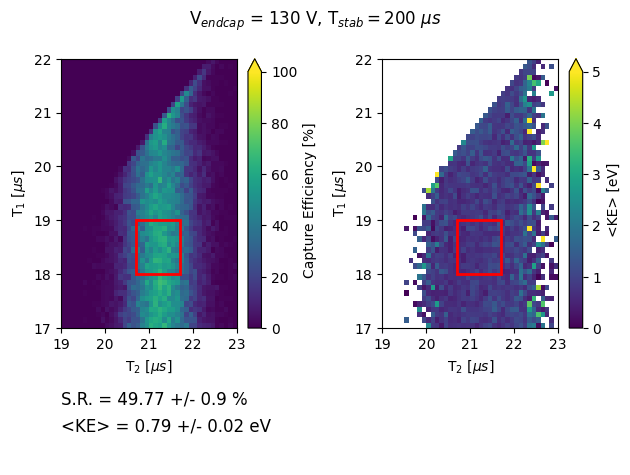

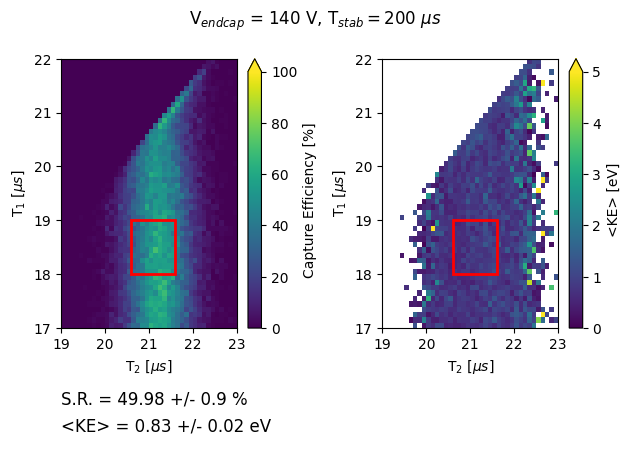

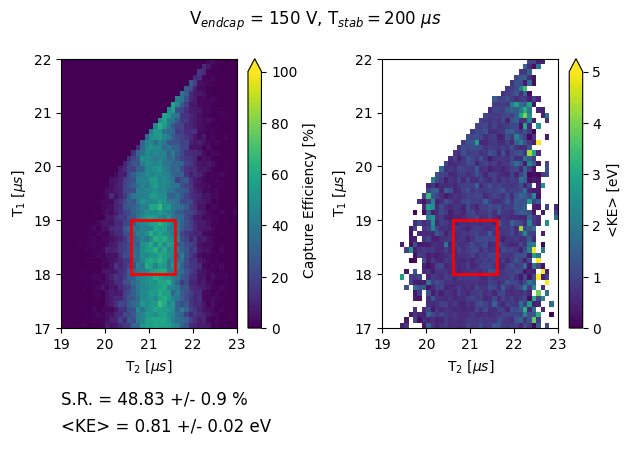

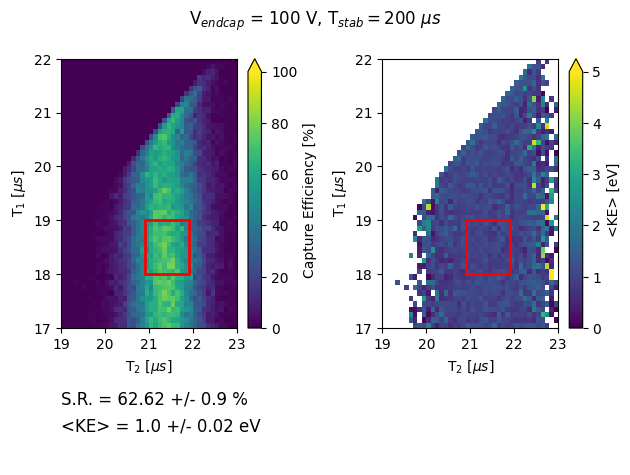

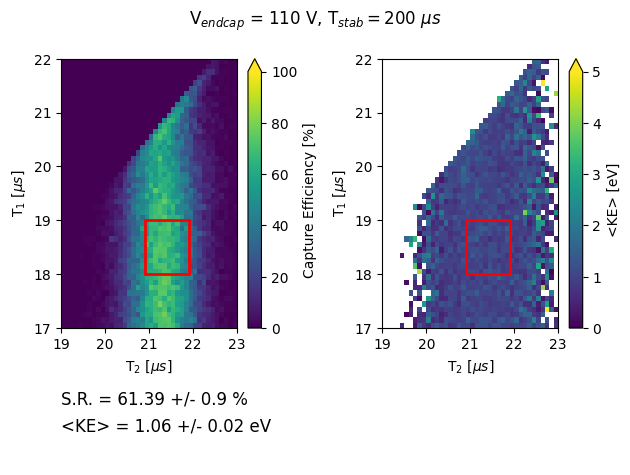

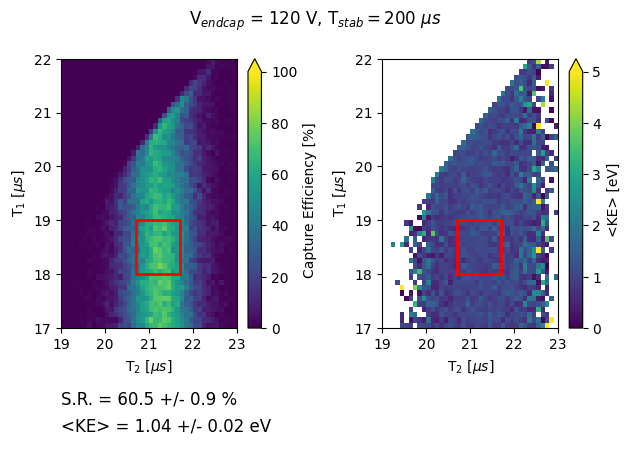

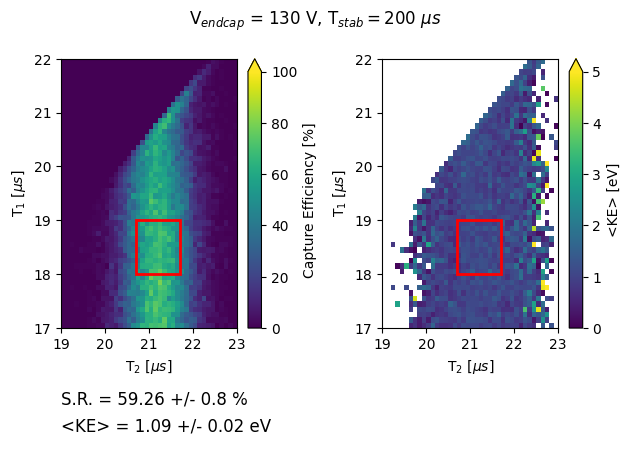

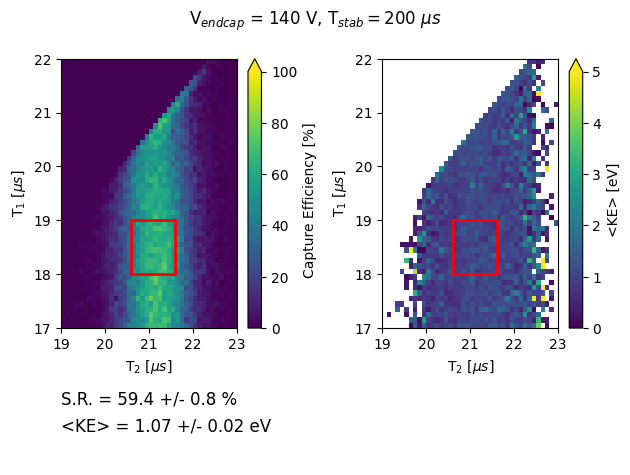

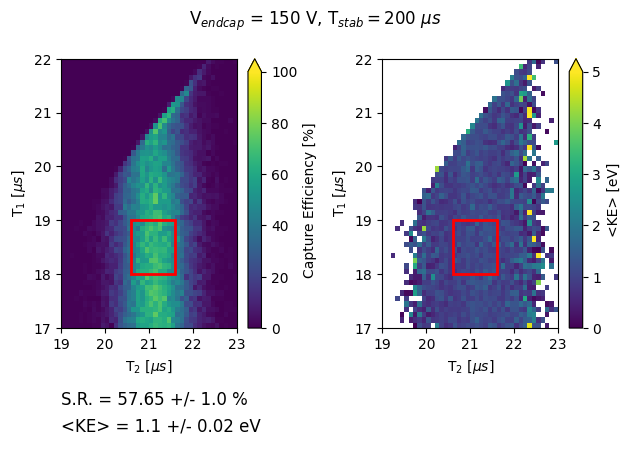

In [3]:
if answer == False:
    
    
    T1_min = 17
    T1_max = 22
    T2_min = 19
    T2_max = 23

    T1_step = 0.1
    T2_step = 0.1

    T_stab = 200

    matrix_stab = ( int((T1_max - T1_min)/T1_step), int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_stab = np.zeros(matrix_stab)
    
    matrix_ke = ( int((T1_max - T1_min)/T1_step), int((T2_max - T2_min)/T2_step)) # add +1 for 0.05 step
    matrix_ke = np.zeros(matrix_ke)

    KE_50_1 = [];
    KE_50_2 = [];
    KE_80_1 = [];
    KE_80_2 = [];
    KE_specific_1 = [];
    KE_specific_2 = [];

    Stab_Criterion_50 = [];
    Stab_Criterion_80 = [];
    Stab_Rate_value = [];
    Stab_Rate_error = [];
    sr_value = [];
    sr_error = [];

    T1_low_gate = [18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18]
    T1_high_gate = [19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19]
    T2_low_gate = [20.9,20.8,20.7,20.7,20.6,20.6,20.9,20.9,20.7,20.7,20.6,20.6,20.9,20.9,20.7,20.7,20.6,20.6]
    T2_high_gate = [21.9,21.8,21.7,21.7,21.6,21.6,21.9,21.9,21.7,21.7,21.6,21.6,21.9,21.9,21.7,21.7,21.6,21.6]

    x_KE = [];

    Counter_gate = -1


    for V_add in range(2,7,2):
        #try:

            for V_endcap in range(100,160,10): 
                #try:

                    #data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/data_Time(17_19_19_21_' + str(V_endcap) + '_200)_4_test.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
                    data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + str(V_add) + '_v2_big.csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
                    #data = pd.read_csv('C:/Users/r0867867/Documents/IonTrap_v2/data/Big Emittance_new/half_rf_half_dc(17_22_20_24_100_200).csv', sep = ',', header=None, skip_blank_lines = True, names = ['IonNumber', 'ToF', 'KE'], skiprows = 1, chunksize = chunksize) #, on_bad_lines='skip'
                    Counter_gate = Counter_gate + 1
                    x_KE.append(V_endcap)
                    i = 0
                    j = 0
                    
                    KE = [];
                    d = [];
                    d_specific = [];
                    sr = [];
                    d_50 = [];
                    d_80 = [];
                    d_50_mean = [];
                    d_80_mean = [];
                    d_50_error = [];
                    d_80_error = [];

                    Stab_number_50 = [];
                    Stab_number_80 = [];
                    Total_bins = int((T1_max - T1_min)/T1_step) * int((T2_max - T2_min)/T2_step)

                    Counter = 0
                    for chunk in data:
                        Counter = Counter + 1

                        KE_chunk = [];
                        chunk['ToF'].astype(float)
                        chunk['KE'].astype(float)

                        part = chunk.IonNumber.str.count('UNSTABLE').sum()
                        KE_chunk = chunk.loc[chunk['ToF'] >= (int(T_stab) - 5), 'KE']

                        matrix_stab[i,j] = ((chunksize - 1)/2 - part)/((chunksize - 1)/2)*100 ## Normalised to 100 

                        if (matrix_stab[i,j] >= 0.4*100):
                            Stab_number_50.append(matrix_stab[i,j])

                        if (matrix_stab[i,j] >= 0.6*100):
                            Stab_number_80.append(matrix_stab[i,j]) 

                        if (((chunksize - 1)/2 - part) != 0): # KE of chunk with higher than 0 Stability
                            matrix_ke[i,j] = sum(KE_chunk)/((chunksize - 1)/2 - part)
                            d.append(matrix_ke[i,j])
                            if ((j >= (T2_low_gate[Counter_gate] - T2_min)/T2_step) and (j < (T2_high_gate[Counter_gate] - T2_min)/T2_step) and (i >= (T1_low_gate[Counter_gate] - T1_min)/T1_step) and (i < (T1_high_gate[Counter_gate] - T1_min)/T1_step) ):
                                d_specific.append(matrix_ke[i,j])
                                sr.append(matrix_stab[i,j])

                        else:
                            matrix_ke[i,j] = np.nan


                        if (((chunksize - 1)/2 - part) >= 60): # KE of chunk with higher than 80% Stability
                            d_80.append(sum(KE_chunk)/((chunksize - 1)/2 - part))

                        if (((chunksize - 1)/2 - part) >= 40): # KE of chunk with higher than 50% Stability
                            d_50.append(sum(KE_chunk)/((chunksize - 1)/2 - part))


                        j += 1
                        if (j%((T2_max - T2_min)/T2_step) == 0): # add +1 for 0.05 step
                            j = 0
                            i += 1

                    x = np.arange(T2_min, T2_max, T2_step)  # add Ti_step
                    y = np.arange(T1_min, T1_max, T1_step)

                    Stab_Criterion_50.append(len(Stab_number_50)/Total_bins) 
                    Stab_Criterion_80.append(len(Stab_number_80)/Total_bins) 

                    ## My new addition:
                    Stab_Rate_value.append(sum(map(sum, matrix_stab))/Total_bins)
                    Stab_Rate_error.append(np.std(matrix_stab)/Total_bins)
                    sr_value.append(sum(sr)/len(sr)) 
                    sr_error.append(np.std(sr)/np.sqrt(len(sr)))

                    ## End of my new addition

                    if (len(d_50) > 0):
                        d_50_mean = sum(d_50)/len(d_50)
                        d_50_error = np.std(d_50)/np.sqrt(len(d_50))
                    else:
                        d_50_mean = 0
                        d_50_error = 0

                    if (len(d_80) > 0):
                        d_80_mean = sum(d_80)/len(d_80)
                        d_80_error = np.std(d_80)/np.sqrt(len(d_80))
                    else:
                        d_80_mean = 0
                        d_80_error = 0
                    
                    if (len(d_specific) > 0):
                        d_specific_mean = sum(d_specific)/len(d_specific)
                        d_specific_error = np.std(d_specific)/np.sqrt(len(d_specific))
                    else:
                        d_specific_mean = 0
                        d_specific_error = 0
                        

                    KE_50_1.append(d_50_mean)
                    KE_50_2.append(d_50_error)
                    KE_80_1.append(d_80_mean)
                    KE_80_2.append(d_80_error)
                    KE_specific_1.append(d_specific_mean)
                    KE_specific_2.append(d_specific_error)

                    fig = plt.figure()
                    fig.suptitle('V$_{endcap}$ = ' + str(V_endcap) + ' V, T$_{stab} = $' + str(T_stab) + ' $\mu s$', fontsize = 12)
                    gs = gridspec.GridSpec(2,2, height_ratios = [4,1])
                    
                    ax1=fig.add_subplot(gs[0,0])
                    ax2=fig.add_subplot(gs[0,1])
                    ax3=fig.add_subplot(gs[1,:])
                    
                    c = ax1.pcolormesh(x+0.05, y+0.05, matrix_stab, vmin = 0, vmax = 100)
                    ax1.add_patch( Rectangle((T2_low_gate[Counter_gate],T1_low_gate[Counter_gate]),1,1, fc = 'none', ec = 'r', lw = 2))
                    ax1.set_xlabel('T$_2$ [$\mu s$]')
                    ax1.set_ylabel('T$_1$ [$\mu s$]')
                    ax1.set_xlim(T2_min, T2_max)
                    ax1.set_ylim(T1_min, T1_max)
                    fig.colorbar(c, ax = ax1, extend = 'max', label = 'Capture Efficiency [%]')
                    
                    c = ax2.pcolormesh(x+0.05, y+0.05, matrix_ke, vmin = 0, vmax = 5) #vmin,vmax
                    ax2.add_patch( Rectangle((T2_low_gate[Counter_gate],T1_low_gate[Counter_gate]),1,1, fc = 'none', ec = 'r', lw = 2))
                    ax2.set_xlabel('T$_2$ [$\mu s$]')
                    ax2.set_ylabel('T$_1$ [$\mu s$]')
                    ax2.set_xlim(T2_min, T2_max)
                    ax2.set_ylim(T1_min, T1_max)
                    fig.colorbar(c, ax = ax2, extend = 'max', label = '<KE> [eV]')
                    
                    ax3.text(0, 0.9, 'S.R. = ' + str(round(sum(sr)/len(sr),3)) + ' +/- ' + str(round(np.std(sr)/np.sqrt(len(sr)),1)) + ' %', fontsize = 12)
                    ax3.text(0, 0.5, '<KE> = ' + str(round(d_specific_mean,2)) + ' +/- ' + str(round(d_specific_error,2)) + ' eV', fontsize = 12) #, bbox=dict(facecolor='red', alpha=0.5)
                    ax3.axis('off')
                    
                    plt.tight_layout()
                    #plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/data_Time(' + str(T1_min) + '_' + str(T1_max) + '_' + str(T2_min) + '_' + str(T2_max) + '_' + str(V_endcap) + '_' + str(T_stab) + ')_' + str(V_add) + '_v2_big.png', dpi = 150)
                    plt.show()

                #except:
                #    print('File with V$_{endcap}$ = ' + str(V_endcap) + ' V and V$_{trap}$ = ' + str(V_add) + ' V does not exist.')
        
        #except:
        #    print('File with V$_{endcap}$ = ' + str(V_endcap) + ' V and V$_{trap}$ = ' + str(V_add) + ' V does not exist.')


#### Let's repeat it using the new KE and their errors





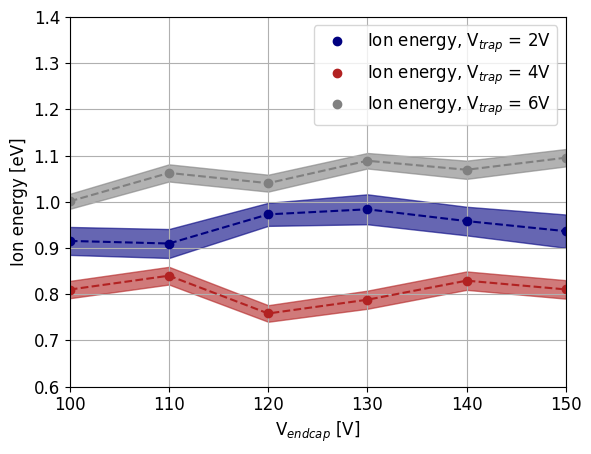

In [34]:
KE_50 = unp.uarray(KE_50_1, KE_50_2)
KE_80 = unp.uarray(KE_80_1, KE_80_2)
KE_specific = unp.uarray(KE_specific_1, KE_specific_2)  ## The one for the time gate

color = ['navy', 'firebrick', 'gray']
i = 0
size = 6 # Numbers of different V_endcaps


for V_add in range(2,7,2):

    plt.errorbar(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color[i], label = 'Ion energy, V$_{trap}$ = ' + str(V_add) +'V', fmt = 'o')
    plt.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color[i], linestyle = '--')

    plt.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) + unp.std_devs(KE_specific[(size*i):(size*(i+1))]), unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) - unp.std_devs(KE_specific[(size*i):(size*(i+1))]), color = color[i], alpha = 0.6)

    plt.xlabel('V$_{endcap}$ [V]', fontsize = 12)
    plt.ylabel('Ion energy [eV]', fontsize = 12)
    plt.legend(fontsize = 12)
    plt.grid()
    plt.ylim(0.6, 1.4)
    plt.xlim(100,150)
    plt.tick_params(axis = 'both', labelsize = 12)

    i += 1
#plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/KE_various_V_trap.png', dpi = 150)

plt.show()

#### KE percent loss

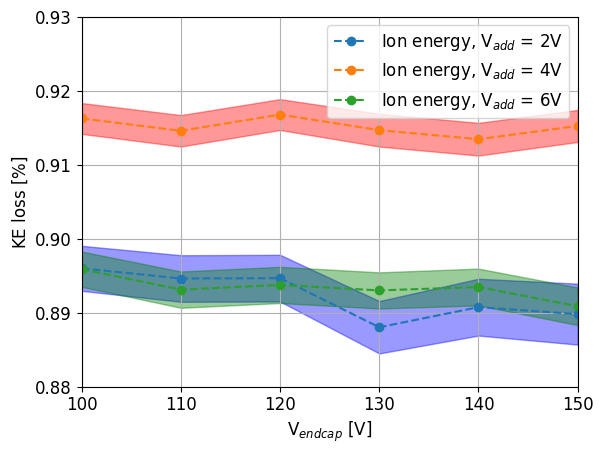

In [33]:
E_beam = uf(10,0.2123) ## within 1 sigma
KE_loss_50 = (E_beam - KE_50)/E_beam
KE_loss_80 = (E_beam - KE_80)/E_beam

color = ['blue', 'red', 'green']
i = 0
size = 6

for V_add in range(2,7,2):

    plt.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_loss_50[(size*i):(size*(i+1))]), marker = 'o', color = None, linestyle = '--', label = 'Ion energy, V$_{add}$ = ' + str(V_add) +'V')
    #plt.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_loss_80[(size*i):(size*(i+1))]), marker = 'o', color = color[i], linestyle = '--', label = '<KE>, Stab. > 60 $\%$, V$_{add}$ = ' + str(V_add) +'V')

    plt.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_loss_50[(size*i):(size*(i+1))]) - unp.std_devs(KE_loss_50[(size*i):(size*(i+1))]), unp.nominal_values(KE_loss_50[(size*i):(size*(i+1))]) + unp.std_devs(KE_loss_50[(size*i):(size*(i+1))]), color = color[i], alpha = 0.4)
    #plt.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_loss_80[(size*i):(size*(i+1))]) - unp.std_devs(KE_loss_80[(size*i):(size*(i+1))]), unp.nominal_values(KE_loss_80[(size*i):(size*(i+1))]) + unp.std_devs(KE_loss_80[(size*i):(size*(i+1))]), color = color[i], alpha = 0.4)

    plt.xlabel('V$_{endcap}$ [V]', fontsize = 12)
    plt.ylabel('KE loss [$\%$]', fontsize = 12)
    plt.ylim(0.88,0.93)
    plt.xlim(100,150)
    plt.legend(fontsize = 12)
    
    plt.grid()
    i +=1

plt.show()

#### Stability Rate

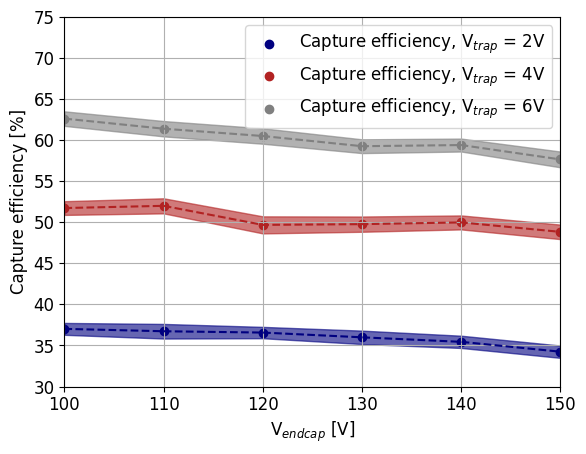

In [32]:
sr_array = unp.uarray(sr_value, sr_error)
#print(sr_array)
color = ['navy', 'firebrick', 'gray']
i = 0
size = 6


for V_add in range(2,7,2):

    #plt.scatter(x_KE[(size*i):(size*(i+1))], Stab_Criterion_50[(size*i):(size*(i+1))], color = color[i], marker = 'o', label = 'Stab. Crit. 40 $\%$, V$_{add} = ' + str(V_add) +'V$')
    plt.scatter(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), color = color[i], marker = 'o', label = 'Capture efficiency, V$_{trap}$ = ' + str(V_add) +'V')

    plt.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), color = color[i], linestyle = '--')
    plt.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(sr_array[(size*i):(size*(i+1))]) + unp.std_devs(sr_array[(size*i):(size*(i+1))]), unp.nominal_values(sr_array[(size*i):(size*(i+1))]) - unp.std_devs(sr_array[(size*i):(size*(i+1))]), color = color[i], alpha = 0.6)

    #plt.legend()
    plt.grid()
    plt.xlabel('V$_{endcap}$ [V]', fontsize = 12)
    plt.ylabel('Capture efficiency [%]', fontsize = 12)
    i += 1
    plt.xlim(100,150)
    plt.legend(fontsize = 12)
    plt.ylim(30,75)
    plt.tick_params(axis = 'both', labelsize = 12)

#plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/sr_various_V_trap.png', dpi = 150)
plt.show()

#### SR and KE

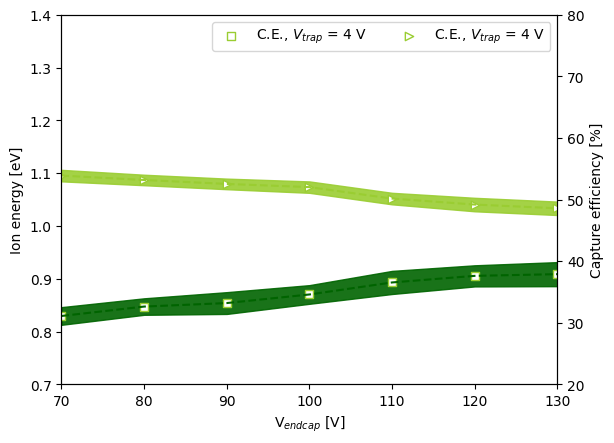

In [44]:
color = ['blue', 'red', 'green']

color_1 = ['darkgreen', 'brown', 'steelblue']
color_2 = ['yellowgreen', 'indianred', 'lightskyblue']

i = 0
size = 6

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for V_add in range(2,7,2):

    ax2.scatter(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), color = color_2[i], marker = 'o', label = 'C.E., $V_{trap}$ = ' + str(V_add) + ' V', alpha = 1)
    ax2.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), color = color_2[i], linestyle = '--', alpha = 1)
    ax2.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(sr_array[(size*i):(size*(i+1))]) + unp.std_devs(sr_array[(size*i):(size*(i+1))]), unp.nominal_values(sr_array[(size*i):(size*(i+1))]) - unp.std_devs(sr_array[(size*i):(size*(i+1))]), color = color_2[i], alpha = 0.7)

    ax1.errorbar(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color_1[i], label = 'I.E., V$_{trap}$ = ' + str(V_add) +'V', fmt = 's', alpha = 1)
    ax1.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color_1[i], linestyle = '--', alpha = 1)
    ax1.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) + unp.std_devs(KE_specific[(size*i):(size*(i+1))]), unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) - unp.std_devs(KE_specific[(size*i):(size*(i+1))]), color = color_1[i], alpha = 0.7)


    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc = 0, ncol = 2)
    #plt.grid()

    ax1.set_xlabel('V$_{endcap}$ [V]')
    ax1.set_ylabel('Ion energy [eV]')
    ax2.set_ylabel('Capture efficiency [%]')

    i += 1
    plt.xlim(100,150)
    ax1.set_ylim(0.7,1.4)
    ax2.set_ylim(20,80)

plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/SR+KE_various_V_trap.png', dpi = 150)
plt.show()

###########################################################################################################################################

color = ['blue', 'red', 'green']
i = 0
size = 6

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for V_add in range(2,7,2):

    ax2.errorbar(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), unp.std_devs(sr_array[(size*i):(size*(i+1))]), color = color[i], fmt = 'o', label = 'C.E., $V_{trap}$ = ' + str(V_add) + ' V', alpha = 1)
    #ax2.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values( sr_array[(size*i):(size*(i+1))] ), color = color[i], linestyle = '--', alpha = 1)

    #ax1.errorbar(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color[i], label = '<KE>, V$_{trap}$ = ' + str(V_add) +'V', fmt = 's', alpha = 0.6)
    #ax1.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = color[i], linestyle = '-', alpha = 0.6)
    ax1.scatter(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]), color = None, edgecolor = color[i], label = '<KE>, V$_{trap}$ = ' + str(V_add) +'V', marker = 's', alpha = 0.6)
    ax1.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) + unp.std_devs(KE_specific[(size*i):(size*(i+1))]), unp.nominal_values(KE_specific[(size*i):(size*(i+1))]) - unp.std_devs(KE_specific[(size*i):(size*(i+1))]), color = color[i], alpha = 0.6)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc = 0, ncol = 2)

    ax1.set_xlabel('V$_{endcap}$ [V]')
    ax1.set_ylabel('Ion energy [eV]')
    ax2.set_ylabel('Capture efficiency [%]')

    i += 1
    #plt.xlim(100,150)
    #ax1.set_ylim(0.7,1.4)
    #ax2.set_ylim(30,100)

#plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/sr_various_V_trap.png', dpi = 150)
plt.show()



#### Stability Criterion

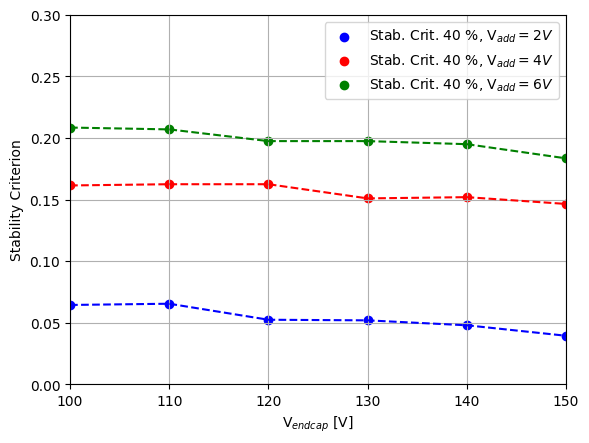

In [46]:
color = ['blue', 'red', 'green']
i = 0
size = 6


for V_add in range(2,7,2):

    plt.scatter(x_KE[(size*i):(size*(i+1))], Stab_Criterion_50[(size*i):(size*(i+1))], color = color[i], marker = 'o', label = 'Stab. Crit. 40 $\%$, V$_{add} = ' + str(V_add) +'V$')
    #plt.scatter(x_KE[(size*i):(size*(i+1))], Stab_Criterion_80[(size*i):(size*(i+1))], color = color[i], marker = 'o', label = 'Stab. Crit. 60 $\%$, V$_{add} = ' + str(V_add) +'V$')
    plt.plot(x_KE[(size*i):(size*(i+1))], Stab_Criterion_50[(size*i):(size*(i+1))], color = color[i], linestyle = '--')
    #plt.plot(x_KE[(size*i):(size*(i+1))], Stab_Criterion_80[(size*i):(size*(i+1))], color = color[i], linestyle = '--')

    plt.legend()
    plt.grid()
    plt.xlabel('V$_{endcap}$ [V]')
    plt.ylabel('Stability Criterion')
    i += 1
    plt.xlim(100,150)
    plt.ylim(0,0.3)

plt.savefig('C:/Users/r0867867/Documents/IonTrap_v2/Figures/Big Emittance_new/SC_various_V_trap.png', dpi = 150)
plt.show()

#### All together

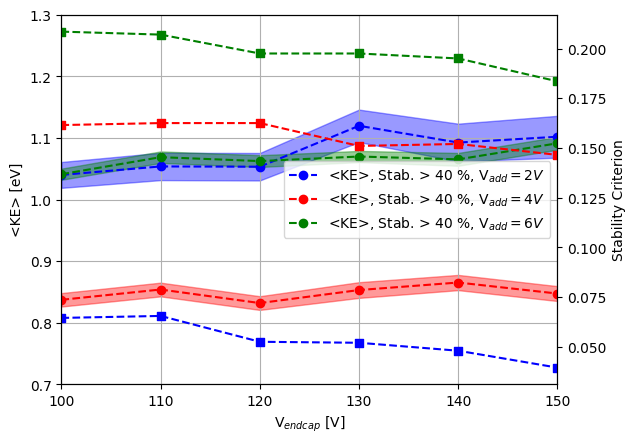

In [43]:
color = ['blue', 'red', 'green']
i = 0

size = 6

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for V_add in range(2,7,2):

    

    ax1.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_50[(size*i):(size*(i+1))]), marker = 'o', color = color[i], linestyle = '--', label = '<KE>, Stab. > 40 $\%$, V$_{add} = ' + str(V_add) +'V$')
    #ax1.plot(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_80[(size*i):(size*(i+1))]), marker = 'o', color = 'blue', linestyle = '--', label = '<KE>, Stab. > 60 $\%$, V$_{add} = ' + str(V_add) +'V$')
    ax1.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_50[(size*i):(size*(i+1))]) - unp.std_devs(KE_50[(size*i):(size*(i+1))]), unp.nominal_values(KE_50[(size*i):(size*(i+1))]) + unp.std_devs(KE_50[(size*i):(size*(i+1))]), color = color[i], alpha = 0.4)
    #ax1.fill_between(x_KE[(size*i):(size*(i+1))], unp.nominal_values(KE_80[(size*i):(size*(i+1))]) - unp.std_devs(KE_80[(size*i):(size*(i+1))]), unp.nominal_values(KE_80[(size*i):(size*(i+1))]) + unp.std_devs(KE_80[(size*i):(size*(i+1))]), color = 'blue', alpha = 0.4)

    ax2.scatter(x_KE[(size*i):(size*(i+1))], Stab_Criterion_50[(size*i):(size*(i+1))], color = color[i], marker = 's')#, label = 'Stab. Crit. 40 $\%$, V$_{add} = ' + str(V_add) + 'V$')
    #ax2.scatter(x_KE[(size*i):(size*(i+1))], Stab_Criterion_80[(size*i):(size*(i+1))], color = 'green', marker = 'o', label = 'Stab. Crit. 60 $\%$, V$_{add} = ' + str(V_add) + 'V$')
    ax2.plot(x_KE[(size*i):(size*(i+1))], Stab_Criterion_50[(size*i):(size*(i+1))], color = color[i], linestyle = '--')
    #ax2.plot(x_KE[(size*i):(size*(i+1))], Stab_Criterion_80[(size*i):(size*(i+1))], color = 'green', linestyle = '--')

    ax1.set_xlabel('V$_{endcap}$ [V]')
    ax1.set_ylabel('<KE> [eV]')
    ax2.set_ylabel('Stability Criterion')

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc = 0)

    ax1.set_ylim(0.7, 1.3)
    #ax2.set_ylim(0, 0.22)
    ax1.set_xlim(100, 150)
    ax1.grid()
    i += 1

#plt.savefig('C:/Users/stefa/Desktop/IonTrap_v2/Figures/Big Emittance_new/Optimal_Sim_Params_big.png', dpi = 150)
plt.show()
